In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv("temperatures.csv")

In [3]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
df.drop(df.loc[:, "ANNUAL":"OCT-DEC"].columns, axis=1, inplace=True)

In [5]:
df["ANNUAL"] = df.mean(axis=1)

In [6]:
df['JAN-FEB'] = df.iloc[:, [0, 1]].mean(axis=1)
df['MAR-MAY'] = df.iloc[:, [2, 3, 4]].mean(axis=1)
df['JUN-SEP'] = df.iloc[:, [5, 6, 7, 8]].mean(axis=1)
df['OCT-DEC'] = df.iloc[:, [8, 10, 11]].mean(axis=1)

In [7]:
df = df.round(decimals=2)

df

<h3>Linear Regression Model</h3>
<h4>Temperature of December</h4>

<b>a) Getting dependent and independent variables</b>

In [8]:
years = df['YEAR']
annual = df['DEC']

<b>b) Converting variables into numpy column vectors</b>

In [9]:
inputs = np.array(years).reshape(-1, 1)
targets = np.array(annual).reshape(-1, 1)

<b>c) Splitting training and testing data (75:25)</b>

In [10]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, train_size=0.75, random_state=42)
print("Training inputs shape \t: ", train_inputs.shape)
print("Testing inputs shape  \t: ", test_inputs.shape)
print("Training Targets shape\t: ", train_targets.shape)
print("Testing Targets shape \t: ", test_targets.shape)

Training inputs shape 	:  (87, 1)
Testing inputs shape  	:  (30, 1)
Training Targets shape	:  (87, 1)
Testing Targets shape 	:  (30, 1)


<b>d) Visualizing the data</b>

Text(0, 0.5, 'Temperature')

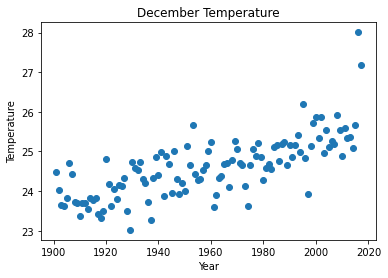

In [11]:
plt.scatter(inputs, targets)
plt.title("December Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature")

<b>e) Defining and training the model</b>

In [12]:
linear_model = LinearRegression()
linear_model.fit(train_inputs, train_targets)

LinearRegression()

<b>f) Model score on testing data</b>

In [13]:
yhat_test = linear_model.predict(test_inputs)

print("R Square Error     : ", r2_score(test_targets, yhat_test))
print("Mean Absolute Error: ", mean_absolute_error(test_targets, yhat_test))
print("Mean Squared Error : ", mean_squared_error(test_targets, yhat_test))

R Square Error     :  0.5343914482347869
Mean Absolute Error:  0.41595204119194285
Mean Squared Error :  0.40793729359218694


<b>g) Plotting the result</b>

Text(0, 0.5, 'Temperature')

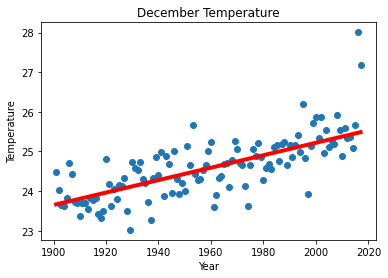

In [14]:
plt.scatter(inputs, targets)
plt.plot(inputs, linear_model.predict(inputs), c='red', linewidth=4)
plt.title("December Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature")